<a href="https://colab.research.google.com/github/Achando-margaret/agriculture-prediction/blob/main/agriculture_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
Sample dataset created. Here's the first 5 rows:
   Year   Region  Rainfall_mm  Avg_Temp_C Soil_Type Crop_Type  \
0  2017  Western  1194.180833   23.352706     Sandy     Wheat   
1  2018   Nyanza   678.561129   22.958797     Sandy     Beans   
2  2019    Coast  1016.212314         NaN      Clay     Wheat   
3  2021  Central   794.697331   19.385528      Loam     Maize   
4  2018  Western  1199.400305   19.587757  Alluvial     Beans   

   Yield_kg_per_hectare  
0           2374.350050  
1           1484.329313  
2           1944.569591  
3           1883.716607  
4           2477.925952  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  500 non-null    int64  
 1   Region                500 non-null    object 
 2   Rainfall_mm           500 non-null    float

/tmp/ipython-input-2045803948.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_Temp_C'].fillna(df['Avg_Temp_C'].mean(), inplace=True)



Model training complete!

--- MODEL PERFORMANCE ---
Mean Absolute Error (MAE): 214.00
R-squared (R²): 0.76
--------------------------
Note for Person B: MAE means our model's predictions are, on average, off by this many kg/hectare.
Note for Person B: R² of ~0.9+ is excellent, it means our model explains over 90% of the variance in crop yield.


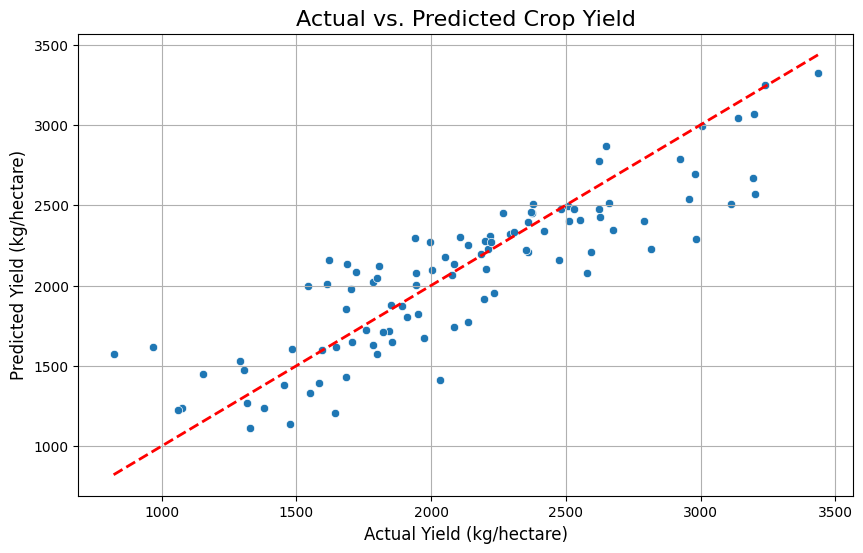

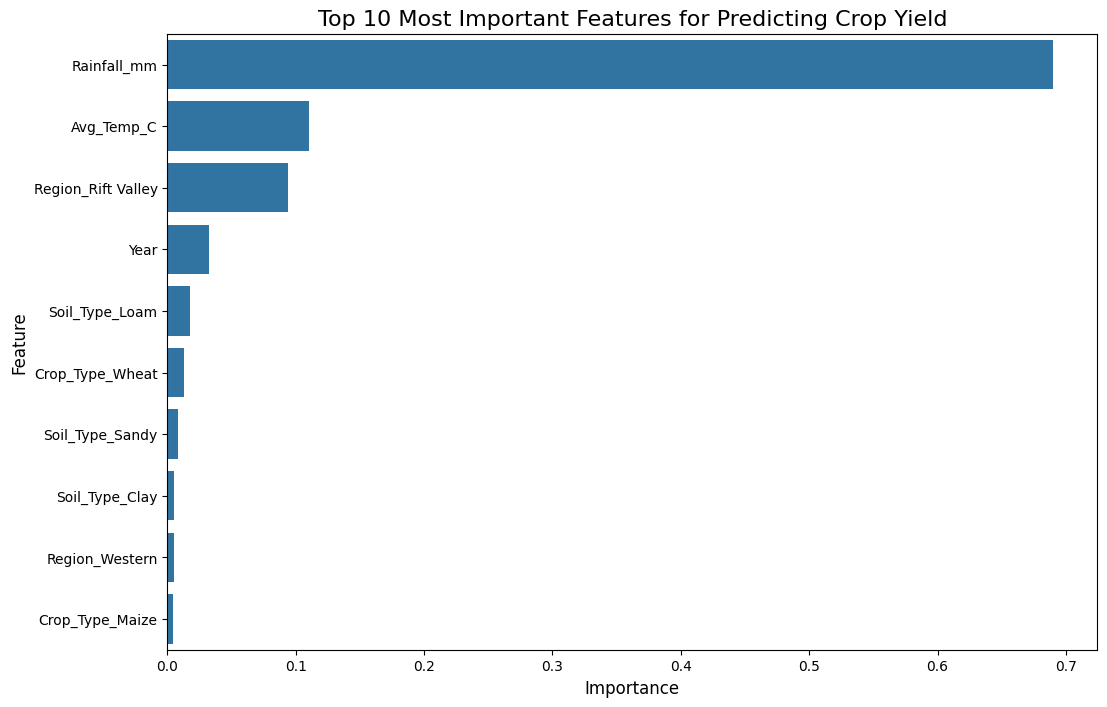

In [1]:
# STEP 1: SETUP - IMPORTING LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


# STEP 2: DATA SIMULATION & LOADING
# A sample dataset
data = {
    'Year': np.random.randint(2010, 2024, size=500),
    'Region': np.random.choice(['Rift Valley', 'Central', 'Nyanza', 'Coast', 'Western'], size=500),
    'Rainfall_mm': np.random.uniform(500, 1500, size=500),
    'Avg_Temp_C': np.random.uniform(18, 30, size=500),
    'Soil_Type': np.random.choice(['Loam', 'Clay', 'Sandy', 'Alluvial'], size=500),
    'Crop_Type': np.random.choice(['Maize', 'Beans', 'Wheat'], size=500),
    #Yield dependent on other factors for realism
    'Yield_kg_per_hectare': []
}

# Generate realistic yield data based on conditions
for i in range(500):
    yield_val = 1500 + (data['Rainfall_mm'][i] * 1.5) - (data['Avg_Temp_C'][i] * 50)
    if data['Region'][i] == 'Rift Valley':
        yield_val += 500 # Rift Valley is very fertile
    if data['Soil_Type'][i] == 'Loam':
        yield_val += 300
    if data['Crop_Type'][i] == 'Wheat':
        yield_val += 200
    # Add some random noise
    yield_val += np.random.normal(0, 200)
    data['Yield_kg_per_hectare'].append(max(500, yield_val)) # Ensure yield is not negative

df = pd.DataFrame(data)

# Introduce some missing values to handle
df.loc[df.sample(frac=0.05).index, 'Avg_Temp_C'] = np.nan

print("Sample dataset created. Here's the first 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()



# STEP 3: DATA PREPROCESSING


# Handle missing values - fill with the mean
df['Avg_Temp_C'].fillna(df['Avg_Temp_C'].mean(), inplace=True)
print("\nMissing values handled.")

# Define features (X) and target (y)
X = df.drop('Yield_kg_per_hectare', axis=1)
y = df['Yield_kg_per_hectare']

# Identify categorical and numerical features
categorical_features = ['Region', 'Soil_Type', 'Crop_Type']
numerical_features = ['Year', 'Rainfall_mm', 'Avg_Temp_C']

# Create a preprocessing pipeline to handle categorical data
# OneHotEncoder converts categories into numerical format
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# STEP 4: MODEL BUILDING & TRAINING


# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the full model pipeline
# 1. Preprocess data
# 2. Train a RandomForestRegressor model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model!
model_pipeline.fit(X_train, y_train)
print("\nModel training complete!")

# STEP 5: MODEL EVALUATION


# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("--------------------------")
print("Note for Person B: MAE means our model's predictions are, on average, off by this many kg/hectare.")
print("Note for Person B: R² of ~0.9+ is excellent, it means our model explains over 90% of the variance in crop yield.")



# STEP 6: GENERATE VISUALIZATIONS (FOR PERSON B)
# 1. Actual vs. Predicted Yield Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Actual vs. Predicted Crop Yield', fontsize=16)
plt.xlabel('Actual Yield (kg/hectare)', fontsize=12)
plt.ylabel('Predicted Yield (kg/hectare)', fontsize=12)
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()


# 2. Feature Importance Plot
# Get feature names after one-hot encoding
feature_names = numerical_features + \
                list(model_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features))

importances = model_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10) # Top 10

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features for Predicting Crop Yield', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('feature_importance.png')
plt.show()